In [1]:
import numpy as np
from regain.data.base import load_Petrobras
from regain.hmm.higher_order_hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt
from decimal import Decimal

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Petrob, BrazCurr,WTI = load_Petrobras()
print(Petrob, BrazCurr,WTI)

           Ultimo Apertura Massimo Minimo    Vol.   Var. %
Data                                                      
20.03.2020  12,22    13,15   13,47  11,85  38,67M   -1,85%
19.03.2020  12,45    11,00   13,05  10,50  68,11M   12,67%
18.03.2020  11,05    11,70   12,20  10,50  73,47M  -15,52%
17.03.2020  13,08    13,66   14,11  13,00  53,01M   -0,38%
16.03.2020  13,13    13,99   14,67  13,10  39,54M  -17,21%
...           ...      ...     ...    ...     ...      ...
28.02.2007  19,57    19,71   19,83  19,30   5,30M   -0,31%
27.02.2007  19,63    19,69   20,10  19,42   4,73M   -4,43%
26.02.2007  20,54    20,54   20,71  20,51   1,75M    0,44%
23.02.2007  20,45    20,43   20,69  20,41   2,88M    0,44%
22.02.2007  20,36    20,20   20,40  20,08   3,31M    1,39%

[3233 rows x 6 columns]             Ultimo Apertura Massimo  Minimo  Var. %
Data                                               
20.03.2020  5,0640   5,0010  5,0662  4,9820  -0,63%
19.03.2020  5,0960   5,1098  5,2140  5,0682  -0,23%


In [3]:
ind_WTI = np.zeros(np.size(WTI.index),bool)

for i,date in enumerate(WTI.index):
    ind_WTI[i] = np.any(Petrob.index==date)
print(np.sum(ind_WTI))

New_Dates = WTI.index[ind_WTI]



ind_braz = np.zeros(np.size(BrazCurr.index),bool)

for i,date in enumerate(BrazCurr.index):
    ind_braz[i] = np.any(New_Dates==date)
print(np.sum(ind_braz))
 
ind_Petr = np.zeros(np.size(Petrob.index),bool)

for i,date in enumerate(Petrob.index):
    ind_Petr[i] = np.any(New_Dates==date)
print(np.sum(ind_Petr))

3198
3198
3198


In [4]:
New_Dates[0]

'20.03.2020'

In [5]:
from datetime import datetime
dates_list = []
for i in range(np.size(New_Dates)-1,0,-1):
    
    date_str = New_Dates[i]

    date_object = datetime.strptime(date_str, '%d.%m.%Y').date()
    dates_list.append(date_object)
print(dates_list)

[datetime.date(2007, 2, 22), datetime.date(2007, 2, 23), datetime.date(2007, 2, 26), datetime.date(2007, 2, 27), datetime.date(2007, 2, 28), datetime.date(2007, 3, 1), datetime.date(2007, 3, 2), datetime.date(2007, 3, 5), datetime.date(2007, 3, 6), datetime.date(2007, 3, 7), datetime.date(2007, 3, 8), datetime.date(2007, 3, 9), datetime.date(2007, 3, 12), datetime.date(2007, 3, 13), datetime.date(2007, 3, 14), datetime.date(2007, 3, 15), datetime.date(2007, 3, 16), datetime.date(2007, 3, 19), datetime.date(2007, 3, 20), datetime.date(2007, 3, 21), datetime.date(2007, 3, 22), datetime.date(2007, 3, 23), datetime.date(2007, 3, 26), datetime.date(2007, 3, 27), datetime.date(2007, 3, 28), datetime.date(2007, 3, 29), datetime.date(2007, 3, 30), datetime.date(2007, 4, 2), datetime.date(2007, 4, 3), datetime.date(2007, 4, 4), datetime.date(2007, 4, 5), datetime.date(2007, 4, 9), datetime.date(2007, 4, 10), datetime.date(2007, 4, 11), datetime.date(2007, 4, 12), datetime.date(2007, 4, 13), dat

In [6]:
BrazCurr_filt = BrazCurr['Ultimo'].values[ind_braz]
WTI_filt = WTI['Ultimo'].values[ind_WTI]
Petrob_filt = Petrob['Ultimo'].values[ind_Petr]
data = np.zeros((np.size(BrazCurr_filt),3))

for i in range(np.size(BrazCurr_filt)):
    data[i,0] = float(BrazCurr_filt[i].replace(',','.'))
    data[i,1] = float(Petrob_filt[i].replace(',','.'))
    data[i,2] = float(WTI_filt[i].replace(',','.'))



In [7]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data[i,:]-data[i-1,:])/data[i-1,:]*100

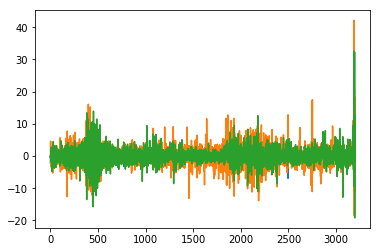

In [8]:
returns_mat = np.flip(returns_mat,axis=0)

plt.plot(returns_mat)

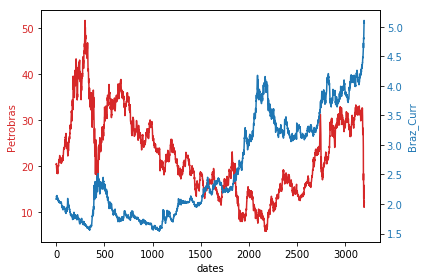

In [9]:
data = np.flip(data,axis=0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('Petrobras', color=color)
ax1.plot( data[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Braz_Curr', color=color)  # we already handled the x-label with ax1
ax2.plot( data[:,0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

NameError: name 'dates' is not defined

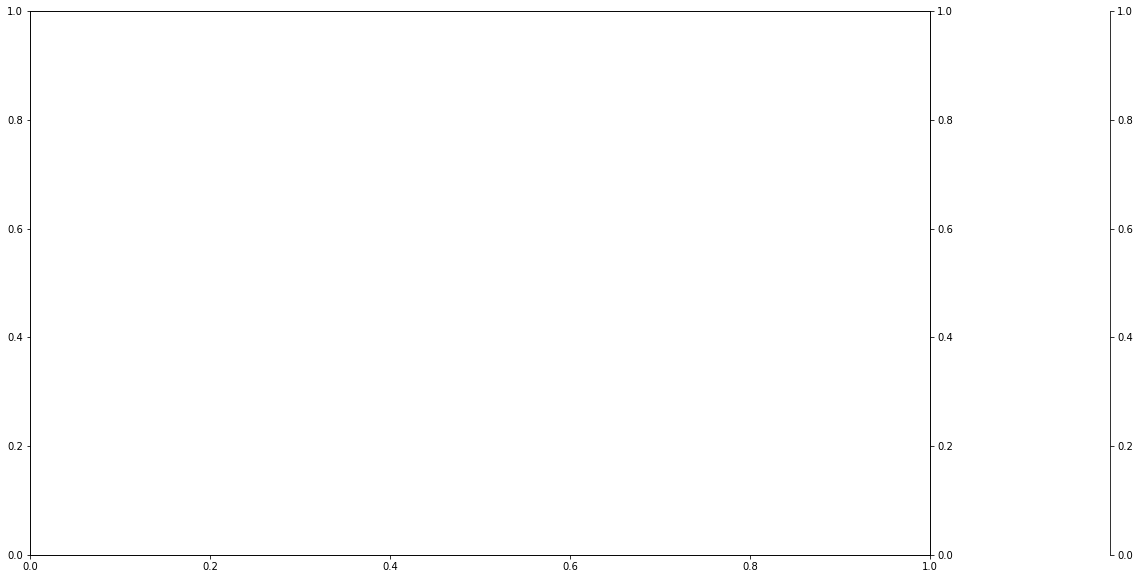

In [10]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots(figsize=(20, 10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(dates,data[-2500:-865,0], "b-", label="Braz_Curr")
p2, = par1.plot(dates,data[-2500:-865,1], "r-", label="Petrobras")
p3, = par2.plot(dates,data[-2500:-865,2], "g-", label="WTI")


host.set_ylabel("Braz_Curr")
par1.set_ylabel("Petrobras")
par2.set_ylabel("WTI")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
degrees = 90
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x',labelrotation=degrees)

lines = [p1, p2, p3]

#host.legend(lines, [l.get_label() for l in lines],loc='lower right', bbox_to_anchor=(1, 0.5))

plt.show()


In [ ]:
import pickle
with open('res.pickle', 'rb') as f:
    [res_pred,res_today,res_emp] =  pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
plt.plot(dates[-165:],np.cumsum(res_pred)/1000)
plt.plot(dates[-165:],np.cumsum(res_emp)/1000)
degrees = 90
plt.xticks(rotation=degrees)

plt.ylabel("Percent of capital\n")

In [11]:
dates = dates_list[-2500:-865]
len(dates)

1635

In [13]:
dates[-1]

datetime.date(2016, 9, 15)

In [15]:
dates[-30:]

[datetime.date(2016, 8, 4),
 datetime.date(2016, 8, 5),
 datetime.date(2016, 8, 8),
 datetime.date(2016, 8, 9),
 datetime.date(2016, 8, 10),
 datetime.date(2016, 8, 11),
 datetime.date(2016, 8, 12),
 datetime.date(2016, 8, 15),
 datetime.date(2016, 8, 16),
 datetime.date(2016, 8, 17),
 datetime.date(2016, 8, 18),
 datetime.date(2016, 8, 19),
 datetime.date(2016, 8, 22),
 datetime.date(2016, 8, 23),
 datetime.date(2016, 8, 24),
 datetime.date(2016, 8, 25),
 datetime.date(2016, 8, 26),
 datetime.date(2016, 8, 29),
 datetime.date(2016, 8, 30),
 datetime.date(2016, 8, 31),
 datetime.date(2016, 9, 1),
 datetime.date(2016, 9, 2),
 datetime.date(2016, 9, 5),
 datetime.date(2016, 9, 6),
 datetime.date(2016, 9, 8),
 datetime.date(2016, 9, 9),
 datetime.date(2016, 9, 12),
 datetime.date(2016, 9, 13),
 datetime.date(2016, 9, 14),
 datetime.date(2016, 9, 15)]

In [ ]:
def ImSet(K,i,nu,m):
    lower = int(np.floor(i / (K ** (nu - m))) * K ** (nu - m))
    upper = int((np.floor(i / (K ** (nu - m))) + 1) * K ** (nu - m))
    return list(range(lower, upper))

In [ ]:
for j in range(int(K**nu)):
    Ir = ImSet(K,j,nu,r)
    K_filt = (kk for kk in range(int(K ** nu)) if np.floor((j) / K) == (kk) - np.floor((kk) / (K ** (nu - 1))) * K ** (nu - 1))
    for k in K_filt:
        xi_sum = sum[xi[:, kk, int(np.floor((kk)/K)+np.floor((k)/(K**(nu-1)))*K**(nu-1))] for kk in Ir]
        gammas_sum = sum[gammas[:-1,kk] for kk in Ir]


In [6]:
import numpy as np
K=4
nu=5
for j in range(int(K**nu)):
    K_filt = (kk for kk in range(int(K**nu)) if np.floor((j)/K)==(kk)-np.floor((kk)/(K**(nu-1)))*K**(nu-1))
    for k in K_filt:
        print(k)

0
256
512
768
0
256
512
768
0
256
512
768
0
256
512
768
1
257
513
769
1
257
513
769
1
257
513
769
1
257
513
769
2
258
514
770
2
258
514
770
2
258
514
770
2
258
514
770
3
259
515
771
3
259
515
771
3
259
515
771
3
259
515
771
4
260
516
772
4
260
516
772
4
260
516
772
4
260
516
772
5
261
517
773
5
261
517
773
5
261
517
773
5
261
517
773
6
262
518
774
6
262
518
774
6
262
518
774
6
262
518
774
7
263
519
775
7
263
519
775
7
263
519
775
7
263
519
775
8
264
520
776
8
264
520
776
8
264
520
776
8
264
520
776
9
265
521
777
9
265
521
777
9
265
521
777
9
265
521
777
10
266
522
778
10
266
522
778
10
266
522
778
10
266
522
778
11
267
523
779
11
267
523
779
11
267
523
779
11
267
523
779
12
268
524
780
12
268
524
780
12
268
524
780
12
268
524
780
13
269
525
781
13
269
525
781
13
269
525
781
13
269
525
781
14
270
526
782
14
270
526
782
14
270
526
782
14
270
526
782
15
271
527
783
15
271
527
783
15
271
527
783
15
271
527
783
16
272
528
784
16
272
528
784
16
272
528
784
16
272
528
784
17
273
529
785
17
27

391
647
903
136
392
648
904
136
392
648
904
136
392
648
904
136
392
648
904
137
393
649
905
137
393
649
905
137
393
649
905
137
393
649
905
138
394
650
906
138
394
650
906
138
394
650
906
138
394
650
906
139
395
651
907
139
395
651
907
139
395
651
907
139
395
651
907
140
396
652
908
140
396
652
908
140
396
652
908
140
396
652
908
141
397
653
909
141
397
653
909
141
397
653
909
141
397
653
909
142
398
654
910
142
398
654
910
142
398
654
910
142
398
654
910
143
399
655
911
143
399
655
911
143
399
655
911
143
399
655
911
144
400
656
912
144
400
656
912
144
400
656
912
144
400
656
912
145
401
657
913
145
401
657
913
145
401
657
913
145
401
657
913
146
402
658
914
146
402
658
914
146
402
658
914
146
402
658
914
147
403
659
915
147
403
659
915
147
403
659
915
147
403
659
915
148
404
660
916
148
404
660
916
148
404
660
916
148
404
660
916
149
405
661
917
149
405
661
917
149
405
661
917
149
405
661
917
150
406
662
918
150
406
662
918
150
406
662
918
150
406
662
918
151
407
663
919
151
407
663


In [9]:
sum([k for k in range(10)])

45

In [10]:
int(3/4)

0